# Fully automatic pipeline

disable tensorflow thousands of messages and select a GPU that is hopefully not used

In [1]:
import warnings
import os
warnings.filterwarnings("ignore")
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [2]:
import prepyto

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# dataset_directory = "/mnt/data/Dropbox/microscopic_anatomy Dropbox/Pyto/102_4e_trimmed/"
# dataset_directory = "/mnt/data/amin/Handpicked/102_4e_trimmed"


# dataset_directory = "/mnt/data/amin/Handpicked/spray_ctrl_10"
# dataset_directory = "/mnt/data/amin/Handpicked/spray_5"
# dataset_directory = "/mnt/resstore/pyto-synapse/neurons/88_4e/analysis_062021"
# dataset_directory = "/mnt/data/amin/Handpicked/133_wtko/analysis_062021/"
dataset_directory = "/mnt/data/amin/Handpicked/84/"

# dataset_directory = "/mnt/data/Dropbox/microscopic_anatomy Dropbox/Pyto/neurons/Julikas Handpicked Tomograms/tomograms of neurons/80_4e"


In [4]:
pl2 = prepyto.Pipeline(dataset_directory)
pl2.network_size=64

Prepyto Pipeline: the pipeline is created for /mnt/data/amin/Handpicked/84


In [5]:
pl2.setup_prepyto_dir()
pl2.run_deep(rescale=0.5)
# pl2.run_deep()
pl2.zoom()

# pl2.run_deep_at_multiple_rescale()
pl2.label_vesicles_simply(within_segmentation_region = True)

# pl2.threshold_tuner()
pl2.make_spheres()


Prepyto Pipeline: setting up prepyto directory
Prepyto pipeline: Running unet segmentation if there are less than 7 file in ./deep directory


reorganizing labels after label clean up: 100%|██████████| 313/313 [00:26<00:00, 11.81it/s]


Prepyto Pipeline: zooming the unet mask
last output array name: deep_mask
last mrc file saved : prepyto/Dummy_84_trim.rec_zoomed_mask.mrc
Prepyto Pipeline: running label_vesicles_simply
Prepyto Pipeline: restricting labels to segmentation region
last output array name: deep_mask
last mrc file saved : prepyto/Dummy_84_trim.rec_zoomed_mask.mrc


Expanding labels until none is too small: 100%|██████████| 4/4 [00:17<00:00,  4.37s/it]


The following labels are too small and couldn't be expanded with decreasing deep mask threshold. Therefore they were removed.
You may want to inspect the region of their centroid, as they may correspond to missed vesicles.
       area  centroid-0   centroid-1  centroid-2
label                                           
27      108   18.398148   282.148148  473.500000
34        8   19.375000   289.000000  481.000000
41        2   22.000000   288.500000  482.000000
54      111   36.018018   635.630631  417.720721
134     191   88.403141   740.759162  422.842932
140      26   88.961538  1026.269231  589.692308
172      97  106.567010   594.463918  341.072165
197     237  118.746835   766.181435  615.810127
407      85  202.317647    53.729412  193.494118
486     266  232.646617   338.270677  364.868421
497     178  234.938202   628.337079  342.247191
500     260  237.715385   271.865385  112.876923
506     316  238.322785   362.550633  553.550633
521      89  262.707865   319.044944  160.

fitting sphere to vesicles: 100%|██████████| 519/519 [00:30<00:00, 17.12it/s]


last output array name: sphere_labels
last mrc file saved : prepyto/Dummy_84_trim.rec_sphere.mrc


In [6]:
# pl2.make_spheres("deep_labels")
pl2.repair_spheres()

519
(array([10, 46, 84]),)
0
1 10
1 46
1 84
(array([16, 65]),)
1
2 16
2 65
(array([18, 23]),)
2
3 18
3 23
(array([ 11,  12,  52,  62,  75,  76, 128]),)
8
9 11
9 12
9 52
9 62
9 75
9 76
9 128
(array([ 1, 35, 42]),)
12
13 1
13 35
13 42
(array([33, 40]),)
18
19 33
19 40
(array([38, 60, 72]),)
21
22 38
22 60
22 72
(array([37, 64]),)
26
27 37
27 64
(array([32, 57]),)
33
34 32
34 57
(array([ 39,  50,  93,  94, 112, 121, 197]),)
36
37 39
37 50
37 93
37 94
37 112
37 121
37 197
(array([48, 77, 83]),)
42
43 48
43 77
43 83
(array([ 49, 100]),)
43
44 49
44 100
(array([ 58,  61,  68,  85, 110, 116, 117, 123, 125, 127, 151, 161, 162,
       191, 210, 219, 231, 237, 240, 251, 254, 266, 268, 282, 283, 297,
       299, 316, 324, 326, 329, 346, 348, 349, 357, 358, 371, 397, 398,
       435, 458, 464, 470, 489, 495, 510, 514]),)
48
49 58
49 61
49 68
49 85
49 110
49 116
49 117
49 123
49 125
49 127
49 151
49 161
49 162
49 191
49 210
49 219
49 231
49 237
49 240
49 251
49 254
49 266
49 268
49 282
49 283
49 29

In [6]:
# pl2.mask_loader()
# pl2.label_vesicles_simply(within_segmentation_region = False)
# pl2.make_spheres()

In [10]:
# pl2.visualization_old_new('sphere_labels','deep_mask')
# pl2.visualization_old_new('deep_labels','deep_mask')
pl2.visualization_old_new('deep_labels','sphere_labels')
# pl2.visualization_old_new('convex_labels','sphere_labels')
# pl2.visualization_old_new('deep_labels', 'convex_labels')

Prepyto Pipeline: visualizing two sets of labels. To continue, close napari window


In [19]:
pl2.visualization_old_new('deep_labels','sphere_labels')

Prepyto Pipeline: visualizing two sets of labels. To continue, close napari window


In [ ]:
pl2.compute_sphere_dataframe('deep_labels')

array([[<AxesSubplot:title={'center':'thickness'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'radius'}>,
        <AxesSubplot:title={'center':'mahalanobis'}>]], dtype=object)

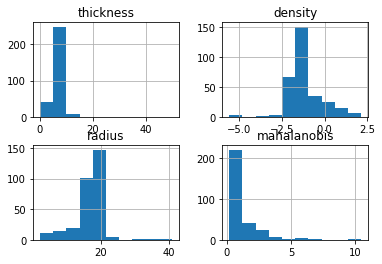

In [13]:
pl2.sphere_df[pl2.sphere_df.density > -10].hist()
#pl2.identify_spheres_outliers(min_mahalanobis_distance=0)
#pl2.fix_spheres_interactively('sphere_labels')

In [21]:
# pl2.visualization_old_new('deep_labels','deep_mask')
# pl2.make_spheres()
# pl2.get_vesicles_from_mod([1,2,3],"active_zone.mrc",)
pl2.evaluation()

0: prepyto
1: Dummy_84_trim.rec.nad
2: az.mod
3: cytomask.mrc.tar.bz2
4: labels_out.mrc
5: labels_out.mrc.tar.bz2
6: merge.mod
7: cell_outline.mod
8: Dummy_84_trim.rec
9: prepyto_trimtest.ipynb
10: deep
11: azmask.mrc.tar.bz2
12: sv.mrc.tar.bz2
Which mrc do you want to use as a reference for evaluation (give the number) ?4
/mnt/data/amin/Handpicked/84/labels_out.mrc
0: Dummy_84_trim.rec_sphere.mrc
1: Dummy_84_trim.rec_sphere_dataframe.pkl
2: Dummy_84_trim.rec_cytomask.mrc
3: Dummy_84_trim.rec_deep_labels.mrc
4: Dummy_84_trim.rec_zoomed_mask.mrc
Which mrc do you want to use as a reference for evaluation (give the number) ?4
/mnt/data/amin/Handpicked/84/prepyto/Dummy_84_trim.rec_zoomed_mask.mrc
(276, 1366, 894)
true positive: 0
true negative: 316431839
false positive: 0
false negative: 20620465
The Pixel Accuracy is: 0.938821171802463
The  Intersection-Over-Union is: 0.0
The Dice Metric: 0.0
Former Dice: 0.8491070669727658


In [5]:
pl2.evaluation(None,"oldprepyto")


0: prepyto
1: az.mod
2: cytomask.mrc.tar.bz2
3: labels_out.mrc
4: labels_out.mrc.tar.bz2
5: merge.mod
6: cell_outline.mod
7: Dummy_133_trim.rec
8: prepyto_trimtest.ipynb
9: deep
10: pyto
11: olddeep
12: azmask.mrc.tar.bz2
13: oldprepyto
14: .ipynb_checkpoints
15: Dummy_133_trim.rec.nad
16: sv.mrc.tar.bz2
Which mrc do you want to use as a reference for evaluation (give the number) ?3
/mnt/data/amin/Handpicked/133_wtko/analysis_062021/labels_out.mrc
0: Dummy_133_trim.rec_sphere_dataframe.pkl
1: Dummy_133_trim.rec_sphere.mrc
2: Dummy_133_trim.rec_deep_labels.mrc
3: Dummy_133_trim.rec_zoomed_mask.mrc
4: Dummy_133_trim.rec_cytomask.mrc
Which mrc do you want to use as a reference for evaluation (give the number) ?1
/mnt/data/amin/Handpicked/133_wtko/analysis_062021/oldprepyto/Dummy_133_trim.rec_sphere.mrc


FileNotFoundError: [Errno 2] No such file or directory: 'oldprepyto'

In [15]:
import mrc_cleaner
import mrcfile
import numpy as np

In [19]:
reference_path = mrc_cleaner.ask_file_path(pl2.dir, file_extension=('.mrc'))
prediction_path = mrc_cleaner.ask_file_path(pl2.save_dir, file_extension=('.mrc'))

reference = mrcfile.open(reference_path)
prediction = mrcfile.open(prediction_path)

reference = reference.data>=10
prediction = prediction.data


0: prepyto
1: labels-16bit.mrc
2: cell_outline.mod
3: active_zone.mod
4: 01.rec
5: deep
6: 1.nad.rec.nad
Which mrc do you want to use as a reference for evaluation (give the number) ?1
/mnt/data/amin/Handpicked/spray_ctrl_10/labels-16bit.mrc
0: 1.nad.rec_zoomed_mask.mrc
1: 1.nad.rec_deep_labels.mrc
2: 1.nad.rec_cytomask.mrc
3: 1.nad.rec_sphere_dataframe.pkl
4: 1.nad.rec_sphere.mrc
Which mrc do you want to use as a reference for evaluation (give the number) ?4
/mnt/data/amin/Handpicked/spray_ctrl_10/prepyto/1.nad.rec_sphere.mrc


In [20]:
# prediction.setflags(write=1)
# prediction[np.where(prediction >= 10)] = 1
# prediction[np.where(prediction >= 1 & (prediction < 10))] = 0
print(np.shape(reference),np.unique(reference))
print(np.shape([prediction]),np.unique(prediction))

(256, 684, 684) [False  True]
(1, 256, 684, 684) [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165]


In [30]:
np.shape(prediction.flatten())
np.shape(reference.flatten())

(119771136,)

In [20]:
reference_path

PosixPath('/mnt/data/amin/Handpicked/spray_ctrl_10/labels-16bit.mrc')

In [6]:
pl2.visualization_old_new('deep_mask','deep_labels')

Prepyto Pipeline: visualizing two sets of labels. To continue, close napari window


In [ ]:
# print(pl2.deep_labels)
import prepyto.visualization
import mrcfile
prepyto.visualization.viz_labels(pl2.image,[pl2.deep_labels,mrcfile.open(dataset_directory+"/sv.mrc").data],["deep","hand"])

In [ ]:
pl2 = prepyto.Pipeline(dataset_directory)
pl2.setup_prepyto_dir()
# pl.run_deep()
pl2.run_deep_at_multiple_rescale()
pl2.label_vesicles_simply()
# pl2.make_spheres()

In [ ]:
pl = prepyto.Pipeline(dataset_directory)
pl.setup_prepyto_dir()
pl.run_deep()
# pl.run_deep_at_multiple_rescale()
pl.label_vesicles_simply()
pl.make_spheres()

In [ ]:
pl.make_full_modfile()
pl.make_full_label_file()
pl.initialize_pyto()

In [ ]:
pl.visualization_old_new('sphere_labels','deep_labels')

In [ ]:
pip install napari[all]

In [ ]:
pl2.visualization_old_new('sphere_labels','deep_mask')

In [ ]:
pl.visualization_old_new('sphere_labels','deep_labels')

In [ ]:
pl2.visualization_old_new('sphere_labels','deep_labels')

In [ ]:
dataset_directory = "/mnt/data/Dropbox/microscopic_anatomy Dropbox/Pyto/neurons/Julikas Handpicked Tomograms/tomograms of neurons/128_wtko"
pl3 = prepyto.Pipeline(dataset_directory)
pl3.setup_prepyto_dir()
# pl2.run_deep()
# pl2.zoom()
pl3.run_deep_at_multiple_rescale()
pl3.label_vesicles_simply()
pl3.make_spheres()

In [9]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt
import numpy as np

import ptitprince as pt

In [46]:
a= [0.832487938292305
,0.798540290828815
,0.714551179746554
,0.640108944450694
,0.724767879330568
,0.638337532322992
,0.781323458116666
,0.744054008874589
,0.82945315325091
,0.712939362389386
,0.857059225807527]


In [47]:
b=[0.761951421601278
,0.734899868614882
,0.648678911524424
,0.56869403665753
,0.643296124065601
,0.636629354141272
,0.668105941089743
,0.689545802263874
,0.777166491806761
,0.695381596017663
,0.849107066972766]


In [41]:
df= pd.DataFrame(data)

In [40]:
data = {'State': ['After Post Processing','After Post Processing','After Post Processing','After Post Processing','After Post Processing','After Post Processing','After Post Processing','After Post Processing','After Post Processing','After Post Processing','After Post Processing',
                  'Raw Deep Model Output','Raw Deep Model Output','Raw Deep Model Output','Raw Deep Model Output','Raw Deep Model Output','Raw Deep Model Output','Raw Deep Model Output','Raw Deep Model Output','Raw Deep Model Output','Raw Deep Model Output','Raw Deep Model Output'],
        'Dice':[0.832487938292305
,0.798540290828815
,0.714551179746554
,0.640108944450694
,0.724767879330568
,0.638337532322992
,0.781323458116666
,0.744054008874589
,0.82945315325091
,0.712939362389386
,0.857059225807527,
0.761951421601278
,0.734899868614882
,0.648678911524424
,0.56869403665753
,0.643296124065601
,0.636629354141272
,0.668105941089743
,0.689545802263874
,0.777166491806761
,0.695381596017663
,0.849107066972766]}

In [42]:
df

,State,Dice
0,After Post Processing,0.832488
1,After Post Processing,0.798540
2,After Post Processing,0.714551
3,After Post Processing,0.640109
4,After Post Processing,0.724768
5,After Post Processing,0.638338
6,After Post Processing,0.781323
7,After Post Processing,0.744054
8,After Post Processing,0.829453
9,After Post Processing,0.712939


Text(0.5, 1.0, 'Figure P7\n Using the pt.Raincloud function')

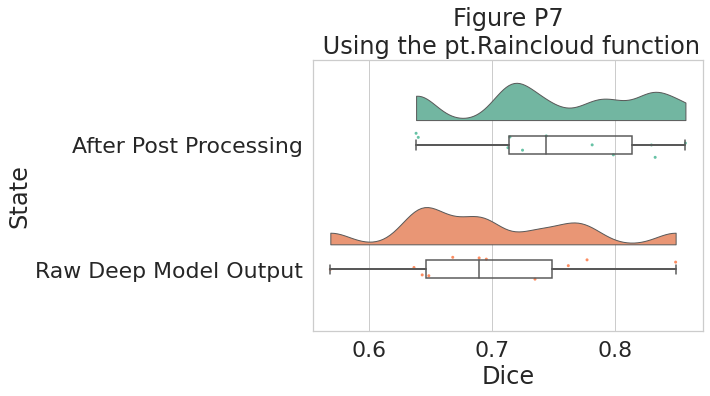

In [44]:
dx = "State"; dy = "Dice"; ort = "h"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort)

plt.title("Figure P7\n Using the pt.Raincloud function")

In [49]:
dd= {'After Post Processing':a , 'Raw Deep Model Output':b}

In [50]:
ddd=pd.DataFrame(dd)

Text(0, 0.5, 'Dice')

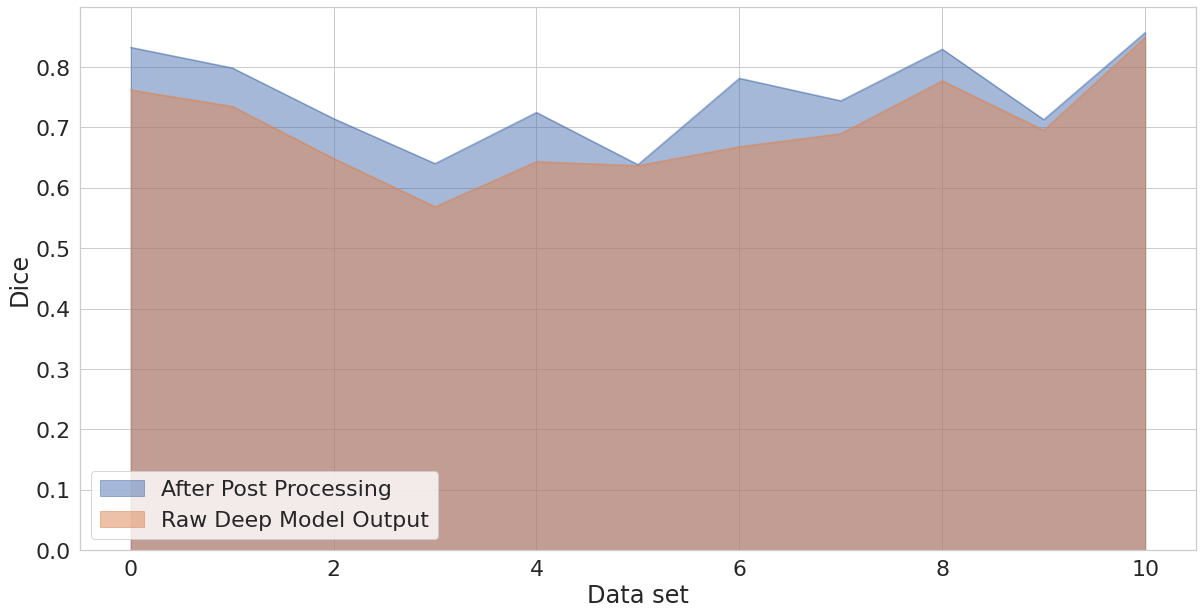

In [57]:
ax=ddd.plot.area(figsize=(20,10),stacked=False)
ax.set_xlabel("Data set")
ax.set_ylabel("Dice")

In [27]:
! pip install SimpleITK

     |████████████████████████████████| 48.4 MB 5.7 MB/s eta 0:00:01


In [45]:
import numpy as np
import SimpleITK as sitk
#from os import listdir
import matplotlib.pyplot as plt
import scipy
#import scipy.misc
import skimage
#from skimage import filters
#from skimage import morphology
#from skimage.morphology import watershed, white_tophat, black_tophat
# from skimage.feature import peak_local_max
from skimage.morphology import square, disk
import PIL
from PIL import Image, ImageOps
import mrcfile

In [42]:
def remove_obj_boundary(img):
    img = img.astype(np.int8)
    orImage = sitk.GetImageFromArray(img)
    image = np.copy(img)
    image[1:-1,1:-1] = 0
    sitkImage = sitk.GetImageFromArray(image)
    recons_filter = sitk.BinaryReconstructionByDilationImageFilter()
    sitkImage = recons_filter.Execute(sitkImage,orImage)
    image = sitk.GetArrayFromImage(sitkImage)
    final = img - image
    return final

def radon_cluster_separation(seg, min_hole_size,top_hat_size,min_size):
#     This funtion analyses the sinogram of each connected component (object) in the image seg using the Radon transform. 
#     It calculates the local minima of the sinogram and reconstruct the corresponding segment of that local minima. 
#     All segments are the candidates to split a cluster. Then the cluster-split is post-processed with the function
#     correct_cluster_separation to discard oversegmentations. 

#     Parameters:
#     min_hole: restriction to accept the holes detected in the sinogram. Recommended 25 pixels
#     top_hat_size: size of the kernel to enhance the contrast in the sinogram. Recommended 10
#     min_size: minimum size (area in pixels) required for the experiment: exosomes diameter is in a range (30,200)nanometers.

    final_im = np.zeros(seg.shape)
    final_im = final_im.astype(np.int8)
#    final_im_os = np.copy(final_im)
    counter = 1
    for j in range(1 ,np.max(seg)+1):
        seg_bin = seg == j
        seg_bin = seg_bin.astype(np.uint8)
        
        if np.sum(seg_bin)>= 2*min_size:            
            image = sitk.GetImageFromArray(seg_bin)
            image = sitk.ConnectedComponent(image)
            fil_label = sitk.LabelShapeStatisticsImageFilter()
            fil_label.Execute(image)
            for l in fil_label.GetLabels():
                BB = fil_label.GetBoundingBox(l)
            CI = seg_bin[BB[1]-1:BB[1]+BB[3]+1, BB[0]-1:BB[0]+BB[2]+1]
            CI_aux = skimage.morphology.erosion(CI,square(4)) 
            theta = np.linspace(0., 180., max(CI.shape), endpoint=False)
            sinogram = skimage.transform.radon(CI_aux, theta=theta, circle = False)
            # Enhance sinogram's edges and intensity differences. 
            new_sinogram = sinogram + skimage.morphology.white_tophat(sinogram,disk(top_hat_size)) - skimage.morphology.black_tophat(sinogram,disk(top_hat_size))
            val = skimage.filters.threshold_otsu(new_sinogram)
            sinogram_image = new_sinogram > val
            sinogram_image = sinogram_image.astype(np.int)
            
            # It may happen that inner holes touch image edges in the sinogram. 
            # Therefore we need to ensure that those wholes won't be removed.
            
            mask = 1-sinogram_image
            mask[:,0] = 0
            mask[:,-1] = 0            
            sinogram_hole = remove_obj_boundary((mask))
            
            # Obtain the local minima of each hole. 
            aux_im = sitk.GetImageFromArray(sinogram_hole)
            aux_im = sitk.ConnectedComponent(aux_im)
            fil_label = sitk.LabelShapeStatisticsImageFilter()
            fil_label.Execute(aux_im)
            aux_im = sitk.GetArrayFromImage(aux_im)
            group_sep_line = np.zeros(CI.shape)
            for l in fil_label.GetLabels():                   
                if np.sum(aux_im == l) >= min_hole_size:
                    aux = np.min(sinogram[aux_im == l])
                    sinogram_hole = np.multiply(sinogram, aux_im == l)
                    # We want a line for the reconstruction. 
                    
                        # The point in the sinogram represents the projection of the pixels that lie in a line: 
                        # the sum of their values. 
                        # Therefore the projection of a complete segment of value 1 in all its pixels will result 
                        # in the length of the diagonal of the image == rows in the sinogram: sinogram.shape[0].
                    
                    reconstruction_fbp = skimage.transform.iradon(sinogram.shape[0]*(sinogram_hole == aux), theta=theta, circle=False)
                    
                    # Adapt the reconstruction to the Region of Interest (ROI) CI.
                    row_l = np.int((reconstruction_fbp.shape[0]-CI.shape[0])/2)
                    col_l = np.int((reconstruction_fbp.shape[1]-CI.shape[1])/2)
                    im = np.zeros(reconstruction_fbp.shape)
                    if row_l == 0 and col_l == 0:
                        im[-CI.shape[0]:, -CI.shape[1]:] = CI
                    elif row_l == 0:
                        im[-CI.shape[0]:, -col_l-CI.shape[1]: -col_l] = CI
                    elif col_l == 0:
                        im[-row_l-CI.shape[0]:-row_l, -CI.shape[1]:] = CI
                    reconstruction_fbp = np.absolute(reconstruction_fbp)                    
                    reconstruction_fbp = np.abs(reconstruction_fbp) > 0.3
                    reconstruction_fbp = skimage.morphology.binary_dilation(reconstruction_fbp, disk(5))
                    reconstruction_fbp = skimage.morphology.thin(reconstruction_fbp)
                    im = np.multiply(im,reconstruction_fbp)
                    
                    if np.sum(np.absolute(im)) > 0:
                        sep_line = im > 0
                    else:
                        sep_line = im
                        
                    if row_l == 0 and col_l == 0:
                        sep_line = sep_line[-CI.shape[0]:, -CI.shape[1]:]
                    elif row_l == 0:
                        sep_line = sep_line[-CI.shape[0]:, -col_l-CI.shape[1]: -col_l]
                    elif col_l == 0:
                        sep_line = sep_line[-row_l-CI.shape[0]:-row_l,  -CI.shape[1]:]    
                    group_sep_line = group_sep_line + sep_line
                    
            # Separate the cluster and correct oversegmentation        
            sep_line = group_sep_line > 0    
            im = np.multiply(CI, 1-sep_line.astype(np.int))            
            im = np.multiply(CI, 1-sep_line.astype(np.int))
            im = correct_cluster_separation(im,CI, min_size)
            aux = np.zeros(im.shape)
            for sub_labels in range(1,np.max(im)+1):
                aux[im == sub_labels] = counter
                counter = counter + 1
                
            final_im[BB[1]-1:BB[1]+BB[3]+1, BB[0]-1:BB[0]+BB[2]+1] = final_im[BB[1]-1:BB[1]+BB[3]+1, BB[0]-1:BB[0]+BB[2]+1] + aux
        else:
            seg_bin[seg_bin == 1] = counter
            counter = counter + 1
            final_im = final_im + seg_bin
        # Return an image with labels. 
        final_im = final_im.astype(np.int8)
        
    return final_im


def correct_cluster_separation(im, CI, min_size):
#     After routines for cluster separation it's common to obtain over segmentation of elements. 
#     This function analyses the resulting cluster-split of an object CI. 
#     Min_size is the minimum size required for the experiment: exosomes diameter is in a range (30,200)nanometers. 
    
    # Label all connected components.
    conncomp = sitk.GetImageFromArray(im)
    conncomp = sitk.ConnectedComponent(conncomp)
    fil_label = sitk.LabelShapeStatisticsImageFilter()
    fil_label.Execute(conncomp)
    conncomp = sitk.GetArrayFromImage(conncomp)
    labels = np.max(conncomp)
    l = 1
    while (l <= labels+1):
        aux = conncomp == l
        aux = aux.astype(np.int8)
        aux = sitk.GetImageFromArray(aux)
        aux = sitk.BinaryFillhole(aux) # After radon cluster split, holes may appear in the image. 
        aux = sitk.GetArrayFromImage(aux) 
        # Correct only too small objects
        if np.sum(aux) < min_size:
            # Obtain the labels nearby the object
            big_aux = skimage.morphology.binary_dilation(aux, square(5))
            big_aux = big_aux-aux
            side_labels = np.multiply(big_aux,conncomp)
            side_labels = np.unique(side_labels[side_labels>0],return_counts=False)
            if len(side_labels) == 1:
                final_l = side_labels
                aux_1 = conncomp == final_l
                aux = aux + aux_1
            else:
                k = 0
                final_l = labels+1
                for sl in range(len(side_labels)):
                    aux_1 = conncomp == side_labels[sl]
                    if np.sum(aux_1)>k:
                        k = np.sum(aux_1)
                        final_l = side_labels[sl]
                aux_1 = conncomp == final_l
                aux = aux + aux_1
            aux = skimage.morphology.binary_dilation(aux,disk(1))
            aux = np.multiply(aux,CI)
            aux = aux.astype(np.int8)
            aux = sitk.GetImageFromArray(aux)
            aux = sitk.BinaryFillhole(aux)
            aux = sitk.GetArrayFromImage(aux)
            # Substitute the new element.
            conncomp[aux == 1] = final_l
            
            # Update labels in connected components.
            for j in range(l+1,labels+1):
                conncomp[conncomp==j]=j-1
            labels = labels-1  
        else:
            conncomp[aux==1] = l
            l = l+1
    return conncomp

(276, 1366, 894)


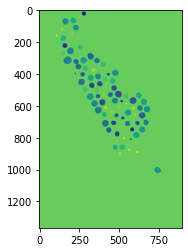

In [51]:
deep_labels = mrcfile.open(pl2.deep_labels_path).data
print(np.shape(deep_labels))
a=radon_cluster_separation( deep_labels[147,:,:] , 50 , 10 , 300 )
plt.imshow(a)